### Loading the dataset and importing the necessary modules

### Implementing the algorithm using the PyTorch library

### Importing the following modules:

* numpy: To deal with the number lists in the project.
* pyplot from matplotlib: To plot the images from the dataset.
* torch: To compute the tensors and build a deep neural network.
* torchvision: To load datasets.
* transforms from torchvision: To transform a tensor into an array.
* datasets from torchvision: To deal with the dataset.
* optim from torch: To implement the optimization algorithm.
* nn from torch: To take the 3-D transpose of the images.

In [5]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

### Create a transformation that will be applied to the dataset.

In [6]:
normalized = transforms.Normalize((0.5,), (0.5,))
tensor = transforms.ToTensor()
transformation = transforms.Compose([tensor, normalized])

### Download the training and testing datasets

In [9]:
path= '/Users/stevearmstrong/handwritten-digit-recognizer/dataset'
training_dataset = datasets.MNIST(path, download=True, train=True, transform=transformation)
testing_dataset = datasets.MNIST(path, download=True, train=False, transform=transformation)

train_data = torch.utils.data.DataLoader(training_dataset, batch_size=64, shuffle=True)
test_data = torch.utils.data.DataLoader(testing_dataset, batch_size=64, shuffle=True)

1.3%

100.0%


Extracting /Users/stevearmstrong/handwritten-digit-recognizer/dataset/MNIST/raw/train-images-idx3-ubyte.gz to /Users/stevearmstrong/handwritten-digit-recognizer/dataset/MNIST/raw



100.0%


Extracting /Users/stevearmstrong/handwritten-digit-recognizer/dataset/MNIST/raw/train-labels-idx1-ubyte.gz to /Users/stevearmstrong/handwritten-digit-recognizer/dataset/MNIST/raw



100.0%


Extracting /Users/stevearmstrong/handwritten-digit-recognizer/dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to /Users/stevearmstrong/handwritten-digit-recognizer/dataset/MNIST/raw



100.0%

Extracting /Users/stevearmstrong/handwritten-digit-recognizer/dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/stevearmstrong/handwritten-digit-recognizer/dataset/MNIST/raw



### Visualize the images

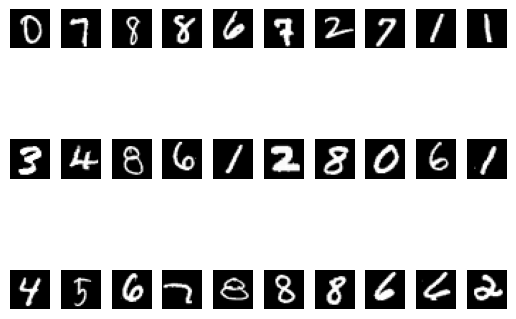

In [11]:
images, labels = next(iter(train_data))
for i in range(30):  
    plt.subplot(3, 10, i+1)  
    plt.subplots_adjust(wspace=0.3)
    plt.imshow(images[i].numpy().squeeze(), cmap='gray')  
    plt.axis('off') 
plt.show()

### Train the model

In [13]:
input_layer = 784
hidden_layer1 = 64
hidden_layer2 = 32
output_layer = 10


model = nn.Sequential(nn.Linear(input_layer, hidden_layer1),
nn.ReLU(),
nn.Linear(hidden_layer1,hidden_layer2),
nn.ReLU(),
nn.Linear(hidden_layer2, output_layer))

### To minimize the loss, the cross-entropy loss is used to adjust the model weights during training using backpropagation.

In [14]:
images = images.view(images.shape[0], -1)
outputs = model(images)
lossFunction = nn.CrossEntropyLoss()
loss = lossFunction(outputs, labels)

### Optimize the weights with each iteration of the model by creating a stochastic gradient descent for the model

In [15]:
gradient_descent = optim.SGD(model.parameters(), lr=0.1)

### Train the model for a certain number of epochs.

In [16]:
epochs = 20
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_data:
        images = images.view(images.shape[0], -1)
        # Feed-Forward
        gradient_descent.zero_grad()
        loss = lossFunction(model(images), labels)
        # Back Propagation
        loss.backward()
        # Optimize the weights
        gradient_descent.step()
        running_loss += loss.item() * images.size(0)
    epoch_loss = running_loss / len(labels)
    print("Iteration : ", epoch+1, end = "\t")
    print("Loss: ", epoch_loss)

Iteration :  1	Loss:  919.8992429971695
Iteration :  2	Loss:  387.1785715557635
Iteration :  3	Loss:  293.44636173546314
Iteration :  4	Loss:  244.93799492530525
Iteration :  5	Loss:  211.62133619748056
Iteration :  6	Loss:  191.8290028385818
Iteration :  7	Loss:  166.9146679500118
Iteration :  8	Loss:  154.46484178910032
Iteration :  9	Loss:  139.4675038047135
Iteration :  10	Loss:  133.31087179062888
Iteration :  11	Loss:  116.94639682397246
Iteration :  12	Loss:  110.27928733732551
Iteration :  13	Loss:  103.54994469042867
Iteration :  14	Loss:  96.91548828897066
Iteration :  15	Loss:  88.44145587971434
Iteration :  16	Loss:  85.75153603591025
Iteration :  17	Loss:  82.72701217606664
Iteration :  18	Loss:  74.89870603696909
Iteration :  19	Loss:  68.67404754232848
Iteration :  20	Loss:  66.69557782623451


### Get the Prediction Label and return the node with the maximum prediction score

In [17]:
def get_predicted_label(image):
    image = image.view(1, 28*28)
    with torch.no_grad():
        prediction_score = model(image)
    return np.argmax(prediction_score)

### Test

In [18]:
images, labels = next(iter(test_data))
print("Predicted Label: ", 
get_predicted_label(images[0]))
print("Actual Label: ", labels.numpy()[0])

Predicted Label:  tensor(0)
Actual Label:  0


### Predict the images from the trained data

In [19]:
totalCount = 0
accurateCount = 0
for images, labels in test_data:
    for i in range(len(labels)):
        predictedLabel = get_predicted_label(images[i])
        actualLabel = labels.numpy()[i]
        print("Predicted Label: ", predictedLabel, " / Actual Label: ", actualLabel)
        if(predictedLabel == actualLabel):
            accurateCount += 1
    totalCount += len(labels)
print("Total images tested: : ", totalCount)
print("Accurate predictions: ", accurateCount)
print("Accuracy percentage: ", ((accurateCount/totalCount)*100), "%")

Predicted Label:  tensor(5)  / Actual Label:  5
Predicted Label:  tensor(2)  / Actual Label:  2
Predicted Label:  tensor(6)  / Actual Label:  6
Predicted Label:  tensor(9)  / Actual Label:  9
Predicted Label:  tensor(3)  / Actual Label:  3
Predicted Label:  tensor(8)  / Actual Label:  8
Predicted Label:  tensor(2)  / Actual Label:  2
Predicted Label:  tensor(0)  / Actual Label:  0
Predicted Label:  tensor(7)  / Actual Label:  7
Predicted Label:  tensor(0)  / Actual Label:  0
Predicted Label:  tensor(1)  / Actual Label:  1
Predicted Label:  tensor(5)  / Actual Label:  5
Predicted Label:  tensor(8)  / Actual Label:  9
Predicted Label:  tensor(7)  / Actual Label:  7
Predicted Label:  tensor(1)  / Actual Label:  1
Predicted Label:  tensor(6)  / Actual Label:  6
Predicted Label:  tensor(2)  / Actual Label:  2
Predicted Label:  tensor(3)  / Actual Label:  3
Predicted Label:  tensor(7)  / Actual Label:  7
Predicted Label:  tensor(0)  / Actual Label:  2
Predicted Label:  tensor(0)  / Actual La